In [15]:
%matplotlib inline

import pandas as pd
import nibabel as nb
from nilearn import plotting, image, masking
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ROI analysis
# ssrt rois: 
# MID rois: nacc

In [20]:
ssrt = pd.read_csv('ssrt.csv')
ssrt['SSRT_demeaned'] = ssrt.SSRT - ssrt.SSRT.mean()

ssrt

,participant,run,frameRate,meanSSD,median,SSRT,SSRT_demeaned
0,1,1,60,0.252941,0.536559,283.618204,-3.692167
1,1,2,60,0.278947,0.524916,245.968457,-41.341914
2,10,1,60,0.035484,0.354962,319.478265,32.167895
3,11,1,60,0.208824,0.421033,212.208981,-75.101390
4,11,2,60,0.193750,0.425839,232.088562,-55.221808
...,...,...,...,...,...,...,...
67,44,2,60,0.196875,0.427020,230.145227,-57.165143
68,46,1,60,0.146875,0.371433,224.558025,-62.752345
69,46,2,60,0.123333,0.389332,265.998433,-21.311938
70,6,1,60,0.214706,0.486903,272.196669,-15.113702


In [40]:
ssrt.pivot(index='participant',columns='run', values='SSRT_demeaned')[1].corr(ssrt.pivot(index='participant',columns='run', values='SSRT_demeaned')[2])

0.3041979615603217

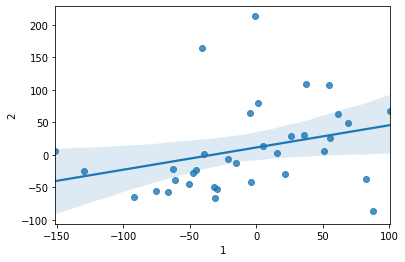

In [39]:
ax = sns.regplot(x = ssrt.pivot(index='participant',columns='run', values='SSRT_demeaned')[1], y = ssrt.pivot(index='participant',columns='run', values='SSRT_demeaned')[2])


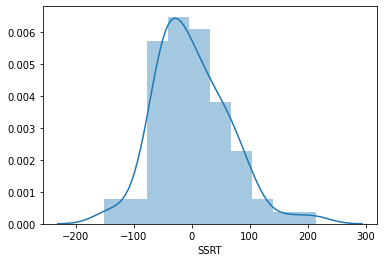

In [18]:
sns.distplot(ssrt.SSRT - ssrt.SSRT.mean())

,Unnamed: 0,participant,run,frameRate,meanSSD,median,SSRT
0,1,1,1,60,0.252941,0.536559,283.618204
1,2,1,2,60,0.278947,0.524916,245.968457
2,3,10,1,60,0.035484,0.354962,319.478265
3,4,11,1,60,0.208824,0.421033,212.208981
4,5,11,2,60,0.193750,0.425839,232.088562
...,...,...,...,...,...,...,...
67,68,44,2,60,0.196875,0.427020,230.145227
68,69,46,1,60,0.146875,0.371433,224.558025
69,70,46,2,60,0.123333,0.389332,265.998433
70,71,6,1,60,0.214706,0.486903,272.196669


In [5]:
!singularity exec /home/06028/tbweng/corral/singularity_images/fsl-6.0.3.simg fslmaths


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any